In [253]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

In [165]:
# Reading whale returns

whale_returns = pd.read_csv("whale_returns.csv", index_col="Date", parse_dates=True, infer_datetime_format=False)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [166]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [168]:
# Drop nulls and verify no nulls in data
whale_returns_df = whale_returns.dropna()
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [169]:
# Reading algorithmic returns

algo_returns = pd.read_csv("algo_returns.csv", index_col="Date", parse_dates=True, infer_datetime_format=False)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [170]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [171]:
# Drop nulls
algo_returns_df = algo_returns.dropna()
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [172]:
# Reading S&P 500 Closing Prices
sp500_history = pd.read_csv("sp500_history.csv", index_col="Date", parse_dates=True, infer_datetime_format=False)
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [173]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [191]:
# Fix Data Types; convert Close to float by stripping out the $ sign in Close column
sp500_history["Close"] = sp500_history["Close"].replace("$", "")

# Check Data Types. If error, convert to float. Otherwise continue.
sp500_history["Close"] = sp500_history["Close"].astype(float)

sp500_history.dtypes

Close    float64
dtype: object

In [192]:
# Calculate Daily Returns
daily_returns = sp500_history.pct_change()
daily_returns.head()


,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [193]:
# Drop nulls
daily_returns_df = daily_returns.dropna()

daily_returns_df.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [194]:
# Rename Close Column to S&P 500

daily_returns_df = daily_returns_df.rename(columns = {"Close" : "S&P 500"})

daily_returns_df.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [195]:
# Concatenate all DataFrames into a single DataFrame

combined_returns = pd.concat([whale_returns_df, algo_returns_df, daily_returns_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_returns.sort_index(inplace=True)

# Display a few rows
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


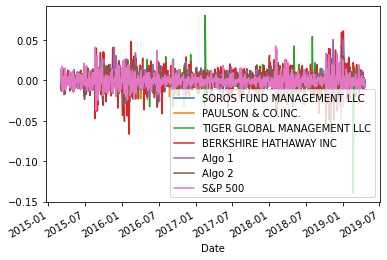

In [196]:
# Plot daily returns

combined_returns.plot()

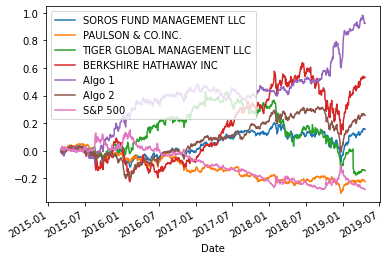

In [201]:
# Plot cumulative returns

cumulative_returns = (1 + combined_returns).cumprod() - 1
cumulative_returns.head()

cumulative_returns.plot()

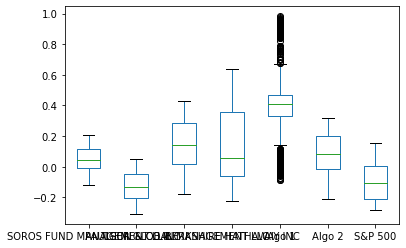

In [207]:
# Plot cumulative returns

cumulative_returns.plot(kind="box")

In [227]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 

daily_std = combined_returns.std()
daily_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [319]:
# Which portfolios are riskier than the S&P 500?

daily_std > daily_std["S&P 500"]

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [248]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = daily_std * np.sqrt(252)
annualized_std.head(7)

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

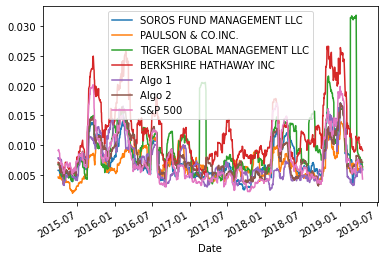

In [249]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window

combined_returns.rolling(window=21).std().plot()

In [257]:
# Construct a correlation table

combined_returns.corr()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [443]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)

berk_df = (whale_returns_df["BERKSHIRE HATHAWAY INC"]).std()
snp_df = daily_returns_df.std()




df = pd.concat([whale_returns_df["BERKSHIRE HATHAWAY INC"], daily_returns_df], axis="columns", join="inner")
df.sort_index(inplace=True)

bk_snp_corr = df.corr()

bk_snp_beta = (bk_snp_corr * berk_df / snp_df)
print(bk_snp_beta)


                        BERKSHIRE HATHAWAY INC   S&P 500
BERKSHIRE HATHAWAY INC                     NaN -0.021856
S&P 500                                    NaN  1.577299


In [405]:
# Concatenate all DataFrames into a single DataFrame

indexed_returns = pd.concat([bk_return, snp_return], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
indexed_returns.sort_index(inplace=True)

# Display a few rows
indexed_returns.head()

,BERKSHIRE HATHAWAY INC,S&P 500
Date,,
2015-03-03,-0.006569,0.004408
2015-03-04,0.004213,-0.001195
2015-03-05,0.006726,0.014378
2015-03-06,-0.013098,-0.003929
2015-03-09,-0.001652,0.017254


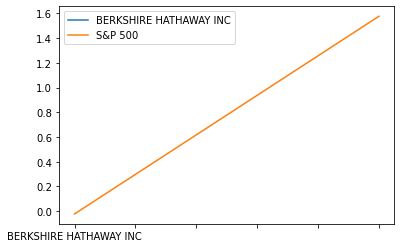

In [424]:
bk_snp_beta.plot() #(x = "S&P 500", y = "BERKSHIRE HATHAWAY INC")

In [ ]:
# Calculate a rolling window using the exponentially weighted moving average. 
